<a href="https://colab.research.google.com/github/hedayet13/learning-tensorflow/blob/main/transfer_learning_in_tensorflow_(fine_tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer learning (Fine tuning)

In [ ]:
#check gpu is running 
!nvidia-smi

Sun Jul 18 15:32:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#helper function 
!wget https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-18 19:23:44--  https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-18 19:23:44 (95.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2021-07-18 19:23:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   224MB/s    in 0.7s    

2021-07-18 19:23:48 (224 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data(filename="10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir(dir_path = "10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = '10_food_classes_10_percent/train'
test_dir  ="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory =train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size =32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode= "categorical",
                                                                batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images , labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.10627548e+02 8.96275482e+01 9.46275482e+01]
   [1.02862244e+02 7.98622437e+01 8.58622437e+01]
   [9.73418350e+01 7.43418350e+01 8.43418350e+01]
   ...
   [2.03198715e+02 1.63198715e+02 1.27198723e+02]
   [2.01877487e+02 1.59877487e+02 1.19877487e+02]
   [1.94755020e+02 1.52755020e+02 1.12755020e+02]]

  [[1.09642860e+02 8.76428604e+01 9.06428604e+01]
   [1.05862244e+02 8.28622437e+01 8.88622437e+01]
   [1.09913269e+02 8.69132690e+01 9.49132690e+01]
   ...
   [2.02846756e+02 1.62846756e+02 1.26846756e+02]
   [2.09056137e+02 1.67056137e+02 1.27056129e+02]
   [2.08760025e+02 1.66760025e+02 1.26760033e+02]]

  [[1.06923470e+02 8.49234695e+01 8.79234695e+01]
   [1.10484695e+02 8.84846954e+01 9.14846954e+01]
   [1.18454086e+02 9.57602081e+01 1.01071434e+02]
   ...
   [2.08341949e+02 1.68341949e+02 1.32341949e+02]
   [2.10397919e+02 1.68397919e+02 1.28397919e+02]
   [2.11704025e+02 1.69704025e+02 1.29704025e+02]]

  ...

  [[1.89642792e+02 1.44642792e+02 7.92142639e+01]
   [1

In [ ]:
## First functional Api

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3),name ="input_layer")

# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

x =base_model(inputs)
print(f"shape after passing inputs through base model :{x.shape}")

x= tf.keras.layers.GlobalAveragePooling2D(name = "Global_average_pulling_layerss")(x)

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)


model_0 = tf.keras.Model(inputs,outputs)

16711680/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base model :(None, 7, 7, 1280)


In [ ]:
model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_10_percent = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25*len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                 experiment_name = "10_percent_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210718-192442
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 42s 294ms/step - loss: 1.8982 - accuracy: 0.3827 - val_loss: 1.3900 - val_accuracy: 0.6562
Epoch 2/5
24/24 [==============================] - 5s 202ms/step - loss: 1.1486 - accuracy: 0.7427 - val_loss: 0.9902 - val_accuracy: 0.7697
Epoch 3/5
24/24 [==============================] - 5s 203ms/step - loss: 0.8406 - accuracy: 0.8093 - val_loss: 0.7799 - val_accuracy: 0.8059
Epoch 4/5
24/24 [==============================] - 5s 201ms/step - loss: 0.6933 - accuracy: 0.8187 - val_loss: 0.6868 - val_accuracy: 0.8289
Epoch 5/5
24/24 [==============================] - 5s 204ms/step - loss: 0.5961 - accuracy: 0.8453 - val_loss: 0.6369 - val_accuracy: 0.8322


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 112ms/step - loss: 0.6124 - accuracy: 0.8428


[0.612419068813324, 0.8428000211715698]

In [ ]:
for layers_number ,layer in enumerate(base_model.layers):
  print(layers_number,layer.name)


0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

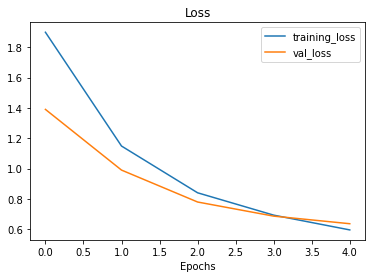

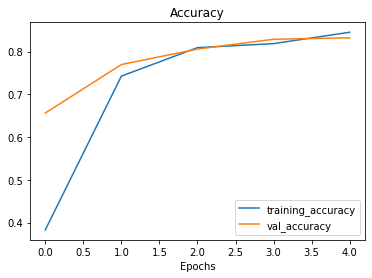

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
input_shape =(1,4,4,3)
tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
# input_tensor

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
global_average_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

#model_1 with 1% of food data


In [6]:
!wget https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/extras/helper_functions.py
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

from helper_functions import unzip_data,plot_loss_curves,create_tensorboard_callback
unzip_data(filename='10_food_classes_1_percent.zip')

--2021-07-19 10:36:06--  https://raw.githubusercontent.com/hedayet13/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-19 10:36:06 (108 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]

--2021-07-19 10:36:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [13]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [14]:
from helper_functions import walk_through_dir
walk_through_dir(dir_path = '10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [15]:
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = 32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          label_mode= "categorical",
                                                                          image_size =IMG_SIZE,
                                                                          batch_size = 32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
#data_augmentation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [17]:
data_augmentation =keras.Sequential(
    [
     preprocessing.RandomFlip("horizontal"),
     preprocessing.RandomRotation(0.2),
     preprocessing.RandomZoom(0.2),
     preprocessing.RandomHeight(0.2),
     preprocessing.RandomWidth(0.2),
    #  preprocessing.Rescaling(1/255.)
    ],
    name = "data_augmentation"
) 

(-0.5, 535.5, 315.5, -0.5)

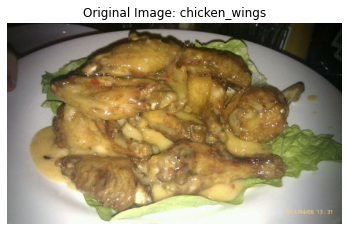

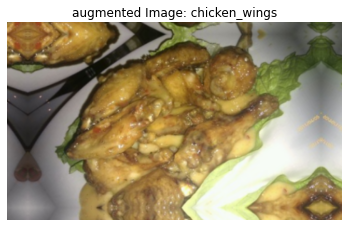

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +"/" + random_image

#original image
img= mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original Image: {target_class}")
plt.axis(False)


augmented_img = data_augmentation(tf.expand_dims(img,axis = 0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f'augmented Image: {target_class}')
plt.axis(False)

In [19]:
input_shape=  (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable= False

#input layer
inputs = tf.keras.layers.Input(shape= input_shape,
                               name = "Input_LAyer",
                               )
x= data_augmentation(inputs)

x=base_model(x,training = False)

x= layers.GlobalAvgPool2D()(x)

#outputs
outputs = layers.Dense(10,activation="softmax",name ="output_layer")(x)

model_1 = keras.Model(inputs,outputs)

model_1.compile(
    loss= "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

16711680/16705208 [==============================] - 0s 0us/step


In [20]:
histroy_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch  =len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 *len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name= "transfer_learning",
                                                                         experiment_name = "1_percent_data_augmentation")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmentation/20210719-103728
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 41s 3s/step - loss: 2.3989 - accuracy: 0.0857 - val_loss: 2.2312 - val_accuracy: 0.1645
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1264 - accuracy: 0.2571 - val_loss: 2.1144 - val_accuracy: 0.2368
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9218 - accuracy: 0.3143 - val_loss: 2.0112 - val_accuracy: 0.2862
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7733 - accuracy: 0.5000 - val_loss: 1.9162 - val_accuracy: 0.3602
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6175 - accuracy: 0.6429 - val_loss: 1.8245 - val_accuracy: 0.4194


In [21]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LAyer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [22]:
results_1_percent_dat_aug = model_1.evaluate(test_data)
results_1_percent_dat_aug

79/79 [==============================] - 9s 114ms/step - loss: 1.8278 - accuracy: 0.4460


[1.827832579612732, 0.44600000977516174]

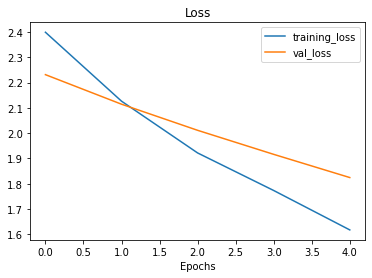

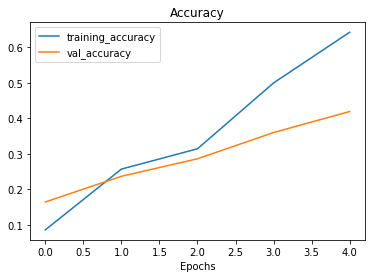

In [23]:
plot_loss_curves(histroy_1_percent)

In [25]:
#model_2

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2021-07-19 10:39:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   297MB/s    in 0.5s    

2021-07-19 10:39:04 (297 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [34]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [37]:
import tensorflow as tf 

IMG_SIZE= (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = "categorical",
                                                                            image_size =IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [38]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential(
    [
     preprocessing.RandomFlip("horizontal"),
     preprocessing.RandomHeight(0.2),
     preprocessing.RandomWidth(0.2),
     preprocessing.RandomRotation(0.2),
     preprocessing.RandomZoom(0.2)
    #  preprocessing.Rescaling(1/255.) no need in efficientnet because it is build in efficient_net
    ],name ="data_augmentation"
)

input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable= False

inputs = layers.Input(shape =input_shape,name= "Input_layers")

x = data_augmentation(inputs)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10,activation="softmax",name = "output_layers")(x)

model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [39]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layers (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
output_layers (Dense)        (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [40]:
#creating model checkpoint 

checkpoint_path  = "ten_percent_model.checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only= True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose =1)

In [41]:
initial_epochs  =5 

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs = initial_epochs,
                                          steps_per_epoch = len(train_data_10_percent),
                                          validation_data = test_data,
                                          validation_steps = int(0.25*len(test_data)),
                                          callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                                   experiment_name = "10_percent_data_aug"),checkpoint_callback],
                                                                                   )

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20210719-104013
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 18s 564ms/step - loss: 2.0696 - accuracy: 0.2853 - val_loss: 1.5683 - val_accuracy: 0.6069

Epoch 00001: saving model to ten_percent_model.checkpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 11s 434ms/step - loss: 1.4063 - accuracy: 0.6467 - val_loss: 1.1155 - val_accuracy: 0.7303

Epoch 00002: saving model to ten_percent_model.checkpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 10s 412ms/step - loss: 1.0858 - accuracy: 0.7213 - val_loss: 0.9108 - val_accuracy: 0.7730

Epoch 00003: saving model to ten_percent_model.checkpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 10s 401ms/step - loss: 0.9227 - accuracy: 0.7667 - val_loss: 0.7979 - val_accuracy: 0.7763

Epoch 00004: saving model to ten_percent_model.checkpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 10s 403ms/step - loss: 0.8426 - accuracy: 0.7707 - val_

In [44]:
model_0.evaluate(test_data)

NameError: ignored

In [48]:
results_10_percent_data_aug=model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 9s 108ms/step - loss: 0.7106 - accuracy: 0.8092


[0.7106167674064636, 0.8091999888420105]

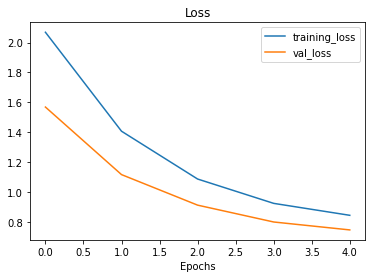

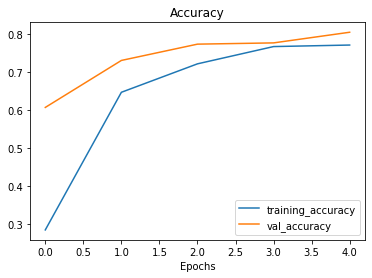

In [45]:
plot_loss_curves(history_10_percent_data_aug)

In [46]:
model_2.load_weights(checkpoint_path)

In [47]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.7106 - accuracy: 0.8092


In [50]:
results_10_percent_data_aug

[0.7106167674064636, 0.8091999888420105]

In [51]:
loaded_weights_model_results

[0.7106167078018188, 0.8091999888420105]

In [52]:
import numpy as np 
np.isclose(np.array(results_10_percent_data_aug),np.array(loaded_weights_model_results))

array([ True,  True])

#Model_3 (Fine_tuning)

In [53]:
model_2.layers

In [55]:
for layer in model_2.layers:
  print(layer , layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8ade49f910> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8bc05cef50> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f8b72284b10> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f8bc0566cd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f8b7216ebd0> True


In [57]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name ,layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [59]:
print(len(model_2.layers[2].trainable_variables))

0


In [63]:
base_model.trainable = True 

#unfreeze last 10 layers

for layer in base_model.layers[:-10]:
  layer.trainable =False

model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr =0.0001), # when fine tuning need to lower learning rate 10x
    metrics = ["accuracy"]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [62]:
for layer_number , layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [64]:
print(len(model_2.trainable_variables))

12


In [65]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

In [66]:
fine_tune_epochs = initial_epochs+5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs= fine_tune_epochs,
                                               steps_per_epoch = len(train_data_10_percent),
                                               validation_data = test_data,
                                               validation_steps = int(0.25*len(test_data)),
                                               initial_epoch =history_10_percent_data_aug.epoch[-1],
                                               callbacks = [create_tensorboard_callback(dir_name= "tensorflow_learning",
                                                                                        experiment_name = "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: tensorflow_learning/10_percent_fine_tune_last_10/20210719-110822
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 19s 528ms/step - loss: 0.7103 - accuracy: 0.7907 - val_loss: 0.6222 - val_accuracy: 0.8224
Epoch 6/10
24/24 [==============================] - 9s 369ms/step - loss: 0.5580 - accuracy: 0.8360 - val_loss: 0.5717 - val_accuracy: 0.8059
Epoch 7/10
24/24 [==============================] - 9s 385ms/step - loss: 0.5134 - accuracy: 0.8413 - val_loss: 0.5781 - val_accuracy: 0.7993
Epoch 8/10
24/24 [==============================] - 9s 379ms/step - loss: 0.4566 - accuracy: 0.8667 - val_loss: 0.5741 - val_accuracy: 0.8092
Epoch 9/10
24/24 [==============================] - 9s 367ms/step - loss: 0.4226 - accuracy: 0.8733 - val_loss: 0.5658 - val_accuracy: 0.8043
Epoch 10/10
24/24 [==============================] - 9s 356ms/step - loss: 0.3908 - accuracy: 0.8880 - val_loss: 0.5371 - val_accuracy: 0.8289


In [67]:
 results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 0.5180 - accuracy: 0.8288


In [68]:
results_10_percent_data_aug

[0.7106167674064636, 0.8091999888420105]

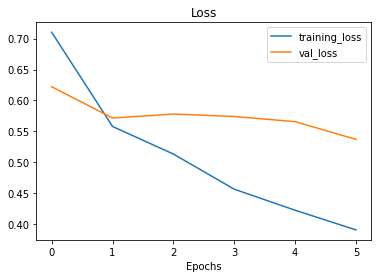

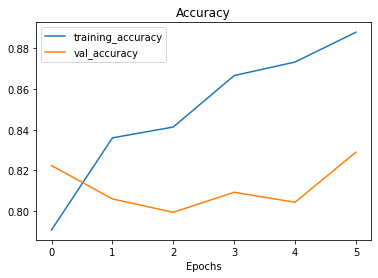

In [69]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [76]:
def compare_historys(original_history ,new_history, initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]


  total_acc = acc+new_history.history["accuracy"]
  total_loss = loss+new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss +new_history.history["val_loss"]

  plt.figure(figsize=(10,7))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="accuracy")
  plt.plot(total_val_acc, label ="val_accuracy")

  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="start fine tuning")
  plt.legend(loc="lower right")
  plt.title("Training and validation Accuracy")


  plt.figure(figsize=(10,7))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="loss")
  plt.plot(total_val_loss, label ="val_loss")

  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="start fine tuning")
  plt.legend(loc="upper right")
  plt.title("Training and validation losss")

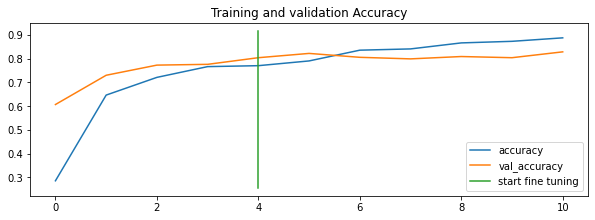

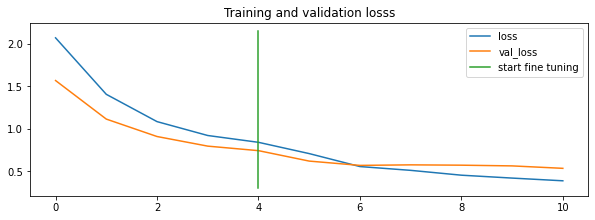

In [77]:

compare_historys(history_10_percent_data_aug,
                 history_fine_10_percent_data_aug)

#Model_4 (fineTuning) wiht bigger data(full data)

In [79]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2021-07-19 11:53:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   257MB/s    in 1.9s    

2021-07-19 11:53:27 (257 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [80]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir =  "10_food_classes_all_data/test"

In [81]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [82]:
import tensorflow as tf 
IMG_SIZE =(224,224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode ="categorical",
                                                                                 image_size =IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [83]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 0.5180 - accuracy: 0.8288


[0.5179746150970459, 0.8288000226020813]

In [84]:
results_fine_tune_10_percent

[0.5179747939109802, 0.8288000226020813]

In [85]:
model_2.load_weights(checkpoint_path)

In [86]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 0.7106 - accuracy: 0.8092


[0.7106166481971741, 0.8091999888420105]

In [87]:
results_10_percent_data_aug

[0.7106167674064636, 0.8091999888420105]

In [88]:
for layer in model_2.layers:
  print(layer.name , layer.trainable)

Input_layers True
data_augmentation True
efficientnetb0 True
global_average_pooling2d_3 True
output_layers True


In [90]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [92]:
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
    metrics = ["accuracy"]
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [96]:
fine_tune_epochs = initial_epochs+5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs = fine_tune_epochs,
                                           steps_per_epoch = len(train_data_10_classes_full),
                                           validation_data = test_data,
                                           validation_steps = int(0.25*len(test_data)),
                                           initial_epoch= history_10_percent_data_aug.epoch[-1],
                                           callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                                    experiment_name = "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20210719-121034
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 53s 202ms/step - loss: 0.7322 - accuracy: 0.7599 - val_loss: 0.4490 - val_accuracy: 0.8438
Epoch 6/10
235/235 [==============================] - 56s 237ms/step - loss: 0.5900 - accuracy: 0.8105 - val_loss: 0.3937 - val_accuracy: 0.8734
Epoch 7/10
235/235 [==============================] - 55s 230ms/step - loss: 0.5331 - accuracy: 0.8281 - val_loss: 0.4048 - val_accuracy: 0.8717
Epoch 8/10
235/235 [==============================] - 51s 213ms/step - loss: 0.4885 - accuracy: 0.8444 - val_loss: 0.3548 - val_accuracy: 0.8783
Epoch 9/10
235/235 [==============================] - 46s 195ms/step - loss: 0.4471 - accuracy: 0.8536 - val_loss: 0.3613 - val_accuracy: 0.8799
Epoch 10/10
235/235 [==============================] - 46s 193ms/step - loss: 0.4223 - accuracy: 0.8613 - val_loss: 0.3909 - val_accuracy: 0.8684


In [97]:
results_fine_tune_full_data = model_2.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.3409 - accuracy: 0.8796


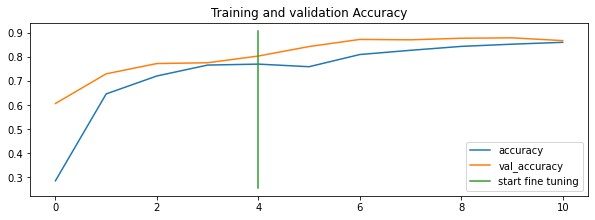

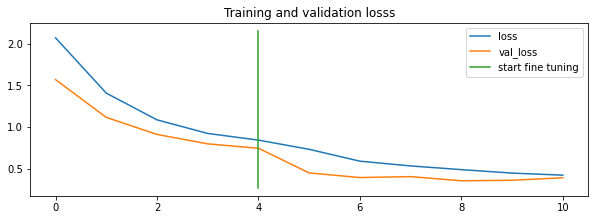

In [98]:
compare_historys(original_history = history_10_percent_data_aug,
                 new_history=  history_fine_10_classes_full,
                 initial_epochs = 5)

In [102]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments with 1- Food 101 classes" \
  --description "A series of different transfer learning experiment " \
  --one_shot

2021-07-19 12:20:44.106524: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3

In [103]:
#https://tensorboard.dev/experiment/hQbmgcdyQJyN7bBeO6Kj3Q/

In [105]:


!tensorboard dev list


2021-07-19 12:26:36.001566: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
https://tensorboard.dev/experiment/hQbmgcdyQJyN7bBeO6Kj3Q/
	Name                 Transfer learning experiments with 1- Food 101 classes
	Description          A series of different transfer learning experiment 
	Id                   hQbmgcdyQJyN7bBeO6Kj3Q
	Created              2021-07-19 12:21:04 (5 minutes ago)
	Updated              2021-07-19 12:21:07 (5 minutes ago)
	Runs                 6
	Tags                 5
	Scalars              96
	Tensor bytes         0
	Binary object bytes  2553151
https://tensorboard.dev/experiment/YoXnjyoSQlGQBN15WmuGxA/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          comparing two different tf hub
